### 라이브러리 import & 파일 다운로드

In [1]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import json

In [3]:
file_path = "1107_Youtube_Trending_Dataset/"
file_name = "KR_youtube_trending_data.csv"

In [18]:
df = pd.read_csv(file_path + file_name)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233754 entries, 0 to 233753
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           233754 non-null  object
 1   title              233754 non-null  object
 2   publishedAt        233754 non-null  object
 3   channelId          233754 non-null  object
 4   channelTitle       233754 non-null  object
 5   categoryId         233754 non-null  int64 
 6   trending_date      233754 non-null  object
 7   tags               233754 non-null  object
 8   view_count         233754 non-null  int64 
 9   likes              233754 non-null  int64 
 10  dislikes           233754 non-null  int64 
 11  comment_count      233754 non-null  int64 
 12  thumbnail_link     233754 non-null  object
 13  comments_disabled  233754 non-null  bool  
 14  ratings_disabled   233754 non-null  bool  
 15  description        229291 non-null  object
dtypes: bool(2), int64(5)

In [5]:
category_file = "KR_category_id.json"

with open(file_path + category_file, 'r', encoding = 'utf-8') as file:
    category_dict = json.load(file)

In [6]:
category_dict = category_dict['items']

In [7]:
category_mapping = dict()

for item in category_dict:
    try:
        category_mapping[int(item['id'])] = item['snippet']['title']
    except:
        category_mapping[int(item['id'])] = ''

category_mapping

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233754 entries, 0 to 233753
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           233754 non-null  object
 1   title              233754 non-null  object
 2   publishedAt        233754 non-null  object
 3   channelId          233754 non-null  object
 4   channelTitle       233754 non-null  object
 5   categoryId         233754 non-null  int64 
 6   trending_date      233754 non-null  object
 7   tags               233754 non-null  object
 8   view_count         233754 non-null  int64 
 9   likes              233754 non-null  int64 
 10  dislikes           233754 non-null  int64 
 11  comment_count      233754 non-null  int64 
 12  thumbnail_link     233754 non-null  object
 13  comments_disabled  233754 non-null  bool  
 14  ratings_disabled   233754 non-null  bool  
 15  description        229291 non-null  object
dtypes: bool(2), int64(5)

### df 전처리

In [9]:
def clean_trending_date(date):
    date = date[:10]
    date = date.replace('-', '')
    return int(date[2:])


def split_tag(tag):
    if tag == '[none]': return []
    return tag.lower().replace('"', '').split('|')


def preprocess_df(df):
    df['trending_date'] = df['trending_date'].apply(clean_trending_date)
    df['tags'] = df['tags'].apply(split_tag)

### 중복 영상 제거 df 생성 (가장 빠른 날짜 기준)

In [21]:
unique_df = df.sort_values('trending_date', ascending = True)
unique_df = df.drop_duplicates(subset = 'video_id', keep = 'first')

In [22]:
unique_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25581 entries, 0 to 233621
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           25581 non-null  object
 1   title              25581 non-null  object
 2   publishedAt        25581 non-null  object
 3   channelId          25581 non-null  object
 4   channelTitle       25581 non-null  object
 5   categoryId         25581 non-null  int64 
 6   trending_date      25581 non-null  object
 7   tags               25581 non-null  object
 8   view_count         25581 non-null  int64 
 9   likes              25581 non-null  int64 
 10  dislikes           25581 non-null  int64 
 11  comment_count      25581 non-null  int64 
 12  thumbnail_link     25581 non-null  object
 13  comments_disabled  25581 non-null  bool  
 14  ratings_disabled   25581 non-null  bool  
 15  description        25037 non-null  object
dtypes: bool(2), int64(5), object(9)
memory usage

230812 ~ 231107 기준

233754 개에서 25581 개로 줄었음. (약 10퍼센트) -> ???그럴수있나?

In [26]:
25581/233754

0.10943556046099746

In [33]:
preprocess_df(unique_df)

C:\Users\kjsoo\AppData\Local\Temp\ipykernel_10636\3505363311.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trending_date'] = df['trending_date'].apply(clean_trending_date)
C:\Users\kjsoo\AppData\Local\Temp\ipykernel_10636\3505363311.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(split_tag)


In [34]:
unique_df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,200812,"[보겸, bokyem]",5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,200812,"[총몇명, 재밌는 만화, 부락토스, 루시퍼, 총몇명 프리퀄, 총몇명 스토리]",963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,200812,"[양팡, 양팡유튜브, 팡튜브, 가족시트콤, 양팡가족, 양팡가족시트콤, 양팡언니, 현...",2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,200812,"[꽈뚜룹, 한국여행기, quaddurup, 뚜룹이, korea, southkorea...",1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,200812,"[jyp entertainment, jyp, j.y.park, jypark, 박진영...",3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233590,mwKJfNYwvm8,I Built 100 Wells In Africa,2023-11-04T16:00:00Z,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,231107,[[none]],58401686,5130261,0,120483,https://i.ytimg.com/vi/mwKJfNYwvm8/default.jpg,False,False,Click the link below to donate https://www.bea...
233605,4Y05XXdOwbo,[혹성탈출: 새로운 시대] 티저 예고편,2023-11-02T15:45:23Z,UCmtjEZ9fXPph2RiAvStIjPg,20th Century Studios Korea,1,231107,[[none]],1012542,3965,0,886,https://i.ytimg.com/vi/4Y05XXdOwbo/default.jpg,False,False,레전드 블록버스터 시리즈의 귀환![혹성탈출: 새로운 시대] 티저 예고편 공개2024...
233611,iklotj8e9FI,"[ENG] 231011 mini핑계고 : 유재석, 조세호, 박보영 @뜬뜬편집실 (O...",2023-11-03T03:00:31Z,UCDNvRZRgvkBTUkQzFoT_8rA,뜬뜬 DdeunDdeun,23,231107,"[뜬뜬, 핑계고, 유재석, 박보영, 조세호, 정신병동에도아침이와요, 드라마추천, 넷...",1899716,68156,0,4744,https://i.ytimg.com/vi/iklotj8e9FI/default.jpg,False,False,일시 : 2023년 10월 11일 흐림 뒤 맑음장소 : 뜬뜬 편집실참여자 : 유재석...
233612,X8vfOo_MUSc,⭐D즈니 역사상 처음⭐ 모두를 깜짝 놀라게 한 안나의 등장! 19호 가수의 '같이 ...,2023-11-02T15:32:15Z,UCF3UEVPt5zZTlBVJwDG317g,JTBC Voyage,24,231107,"[genre:오디션, format:큐레이션, source:음악, type:방송, s...",1545029,18145,0,1363,https://i.ytimg.com/vi/X8vfOo_MUSc/default.jpg,False,False,D즈니 역사상 최초인 19호 가수02:20 19호 - 같이 눈사람 만들래?#싱어게...


### 비디오 별로 Trend date 값을 list로 모은 딕셔너리 ( { video_id : [ trend_date ] }) 

In [23]:
date_dict = {}

for idx, date in zip(df['video_id'], df['trending_date']):
    if idx in date_dict:
        date_dict[idx].append(date[:10])
    else:
        date_dict[idx] = [date[:10]]

cnt = 0
for key, value in date_dict.items():
    cnt += 1
    print(f"{key}  {value}")
    if cnt == 10: break

uq5LClQN3cE  ['2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18']
I-ZbZCHsHD0  ['2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16']
9d7jNUjBoss  ['2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18']
3pI_L3-sMVg  ['2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18']
zrsBjYukE8s  ['2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18', '2020-08-19']
jbGRowa5tIk  ['2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18']
X-TPQPEyRGo  ['2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18']
REUA4roJndU  ['2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18']
7FOi40uehC4  ['2020-08-12', '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16']
0dsnm3n6ZdM  ['2020-08-12', '2020-

In [95]:
tmp = pd.DataFrame(list(date_dict.items()), columns = ['video_id', 'trending_date_list'])
unique_df_trending_date_list = pd.merge(unique_df, tmp, on='video_id', how='left')

In [96]:
unique_df_trending_date_list.head(5)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,trending_date_list
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN,"[2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1..."
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁...","[2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN,"[2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1..."
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다,"[2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1..."
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...,"[2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1..."


In [97]:
unique_list_df = unique_df_trending_date_list.drop(['channelId', 'trending_date', 'tags', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'description'], axis=1)

unique_list_df.head(5)

,video_id,title,publishedAt,channelTitle,categoryId,view_count,thumbnail_link,trending_date_list
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,보겸 BK,24,5947503,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,"[2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1..."
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,총몇명,1,963384,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,"[2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,양팡 YangPang,22,2950885,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,"[2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1..."
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,꽈뚜룹 Quaddurup,24,1743374,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,"[2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1..."
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,JYP Entertainment,10,3433885,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,"[2020-08-12, 2020-08-13, 2020-08-14, 2020-08-1..."


In [100]:
unique_list_df['trending_date_list'].describe()

count            25581
unique           14273
top       [2020-08-12]
freq                34
Name: trending_date_list, dtype: object

In [101]:
# unique_list_df.to_csv('unique_list_df.csv', index=False)

In [102]:
# unique_df_trending_date_list.to_csv('unique_df_trending_date_list.csv', index = False)

In [103]:
unique_df_trending_date_list

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,trending_date_list
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09T09:32:48Z,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12T00:00:00Z,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN,"[2020-08-12, 2020-08-13, 2020-08-14, 2020-08-15, 2020-08-16, 2020-08-17, 2020-08-18]"
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12T09:00:08Z,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12T00:00:00Z,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁, 찐스톤, Jin, 정영준♬ BGMPrivate Reflection by Kevin Ma...","[2020-08-12, 2020-08-13, 2020-08-14, 2020-08-15, 2020-08-16]"
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10T09:54:13Z,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12T00:00:00Z,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매|짬식이|브이로그|VLog|먹방|부산|부산유튜버|Hàn Quốc|Gia đình|Sitco...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN,"[2020-08-12, 2020-08-13, 2020-08-14, 2020-08-15, 2020-08-16, 2020-08-17, 2020-08-18]"
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11T15:00:58Z,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12T00:00:00Z,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|유학|미국생활|플로리다|브이로그|페이크브이로그,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다,"[2020-08-12, 2020-08-13, 2020-08-14, 2020-08-15, 2020-08-16, 2020-08-17, 2020-08-18]"
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11T09:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|SUNMI|구준엽|DJ Koo|When We Disco|When We Disco (Duet ...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://spoti.fi/2FelHKZiTunes/Apple Music https://apple.co...,"[2020-08-12, 2020-08-13, 2020-08-14, 2020-08-15, 2020-08-16, 2020-08-17, 2020-08-18, 2020-08-19]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25576,mwKJfNYwvm8,I Built 100 Wells In Africa,2023-11-04T16:00:00Z,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2023-11-07T00:00:00Z,[None],58401686,5130261,0,120483,https://i.ytimg.com/vi/mwKJfNYwvm8/default.jpg,False,False,Click the link below to donate https://www.beastphilanthropy.org/campaign/mrbeast-100-wellsNew M...,[2023-11-07]
25577,4Y05XXdOwbo,[혹성탈출: 새로운 시대] 티저 예고편,2023-11-02T15:45:23Z,UCmtjEZ9fXPph2RiAvStIjPg,20th Century Studios Korea,1,2023-11-07T00:00:00Z,[None],1012542,3965,0,886,https://i.ytimg.com/vi/4Y05XXdOwbo/default.jpg,False,False,레전드 블록버스터 시리즈의 귀환![혹성탈출: 새로운 시대] 티저 예고편 공개2024년 극장 대개봉 🎬#혹성탈출_새로운시대 #혹성탈출#KingdomofthePlanetofth...,[2023-11-07]
25578,iklotj8e9FI,"[ENG] 231011 mini핑계고 : 유재석, 조세호, 박보영 @뜬뜬편집실 (OneCam)",2023-11-03T03:00:31Z,UCDNvRZRgvkBTUkQzFoT_8rA,뜬뜬 DdeunDdeun,23,2023-11-07T00:00:00Z,뜬뜬|핑계고|유재석|박보영|조세호|정신병동에도아침이와요|드라마추천|넷플릭스드라마|스우파막방|노래방|장기자랑,1899716,68156,0,4744,https://i.ytimg.com/vi/iklotj8e9FI/default.jpg,False,False,"일시 : 2023년 10월 11일 흐림 뒤 맑음장소 : 뜬뜬 편집실참여자 : 유재석, 조세호, 박보영토크 장르 : 재석이 동생인 세호 동생인 광수 동생인 보영이의 사는 이야...",[2023-11-07]
25579,X8vfOo_MUSc,⭐D즈니 역사상 처음⭐ 모두를 깜짝 놀라게 한 안나의 등장! 19호 가수의 '같이 눈사람 만들래?(겨울왕국 OST)'｜싱어게인3｜JTBC 231102 방송 외,2023-11-02T15:32:15Z,UCF3UEVPt5zZTlBVJwDG317g,JTBC Voyage,24,2023-11-07T00:00:00Z,genre:오디션|format:큐레이션|source:음악|type:방송|series:싱어게인3|topic:썰|person:이승기|person:규현|person:이해리|per...,1545029,18145,0,1363,https://i.ytimg.com/vi/X8vfOo_MUSc/default.jpg,False,False,D즈니 역사상 최초인 19호 가수02:20 19호 - 같이 눈사람 만들래?#싱어게인3 #같이눈사람만들래[JTBC봐야지] 구독하기☞ https://url.kr/q9raxe...,[2023-11-07]


In [104]:
unique_df_trending_date_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25581 entries, 0 to 25580
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   video_id            25581 non-null  object
 1   title               25581 non-null  object
 2   publishedAt         25581 non-null  object
 3   channelId           25581 non-null  object
 4   channelTitle        25581 non-null  object
 5   categoryId          25581 non-null  int64 
 6   trending_date       25581 non-null  object
 7   tags                25581 non-null  object
 8   view_count          25581 non-null  int64 
 9   likes               25581 non-null  int64 
 10  dislikes            25581 non-null  int64 
 11  comment_count       25581 non-null  int64 
 12  thumbnail_link      25581 non-null  object
 13  comments_disabled   25581 non-null  bool  
 14  ratings_disabled    25581 non-null  bool  
 15  description         25037 non-null  object
 16  trending_date_list  25

In [105]:
tmp = unique_list_df.sort_values('categoryId', ascending = True)

In [106]:
tmp

,video_id,title,publishedAt,channelTitle,categoryId,view_count,thumbnail_link,trending_date_list
20015,OxZOC8BO7EI,[짐승친구들] 중요한 것은 꺾이지 않는 마음,2023-01-07T06:00:10Z,짤툰,1,644844,https://i.ytimg.com/vi/OxZOC8BO7EI/default.jpg,"[2023-01-08, 2023-01-09, 2023-01-10, 2023-01-11, 2023-01-12, 2023-01-13, 2023-01-14, 2023-01-15,..."
10210,Tqgw1OTLBjU,병맛더빙 - 말하는 중에 공격하면 안되는 이유,2021-08-21T08:00:14Z,병맛교수,1,79335,https://i.ytimg.com/vi/Tqgw1OTLBjU/default.jpg,"[2021-08-22, 2021-08-23, 2021-08-24, 2021-08-25, 2021-08-26, 2021-08-27, 2021-08-28, 2021-08-29,..."
10236,W7edvITC9g4,[스파이더맨: 노 웨이 홈] 티저 예고편,2021-08-24T01:46:29Z,sonypictureskr,1,1740075,https://i.ytimg.com/vi/W7edvITC9g4/default.jpg,"[2021-08-24, 2021-08-25, 2021-08-26, 2021-08-27, 2021-08-28, 2021-08-29, 2021-08-30, 2021-08-31,..."
1572,6Re572OYWGA,Vent | Among Us Animation,2020-09-25T01:35:34Z,Sechi,1,621003,https://i.ytimg.com/vi/6Re572OYWGA/default.jpg,"[2020-09-25, 2020-09-26, 2020-09-27, 2020-09-28, 2020-09-29, 2020-09-30, 2020-10-01, 2020-10-02,..."
1568,yCWW9HXfvXM,가짜사나이2 보기전 시즌1 20분 순삭 몰아보기,2020-09-25T07:45:02Z,고몽,1,122852,https://i.ytimg.com/vi/yCWW9HXfvXM/default.jpg,"[2020-09-25, 2020-09-26, 2020-09-27]"
...,...,...,...,...,...,...,...,...
4230,6NZ6K1uHEH8,사막마을 벼 수확(6번째 이야기). 벼 탈곡기,2020-12-24T18:00:01Z,어슬렁 어슬렁 아프리카 벌써5년,29,332514,https://i.ytimg.com/vi/6NZ6K1uHEH8/default.jpg,"[2020-12-25, 2020-12-26, 2020-12-27, 2020-12-28, 2020-12-29, 2020-12-31, 2021-01-01, 2021-01-02]"
11844,LqLYuc05364,리얼먹방:) 로제 떡볶이!(ft. 단무지) | Rose Tteokbokki | Korea tteok | Danmuji Muchim | REAL SOUND | ASMR MUK...,2021-11-02T05:26:59Z,농림축산식품부,29,643530,https://i.ytimg.com/vi/LqLYuc05364/default.jpg,"[2021-11-03, 2021-11-04, 2021-11-07, 2021-11-08, 2021-11-09, 2021-11-10, 2021-11-11, 2021-11-12,..."
19308,20YoaN7KUig,"리얼먹방:) 고추장 닭 불고기, 동치미, 계란말이 l Red pepper paste chicken bulgogi, dongchimi, egg rolls l ASMR MUK...",2022-11-29T11:00:01Z,농림축산식품부,29,292393,https://i.ytimg.com/vi/20YoaN7KUig/default.jpg,"[2022-11-30, 2022-12-05, 2022-12-06, 2022-12-07]"
4761,DUs8YNw8scI,[법륜스님의 즉문즉설 제 1670회] 남편과 함께 있을 때 가슴이 답답하고 머리가 멍합니다,2021-01-13T20:00:03Z,법륜스님의 즉문즉설,29,67682,https://i.ytimg.com/vi/DUs8YNw8scI/default.jpg,"[2021-01-14, 2021-01-16, 2021-01-17, 2021-01-18, 2021-01-19, 2021-01-20, 2021-01-21]"


100%|███████████████████████████████████████████████████████| 25581/25581 [00:11<00:00, 2138.68it/s]


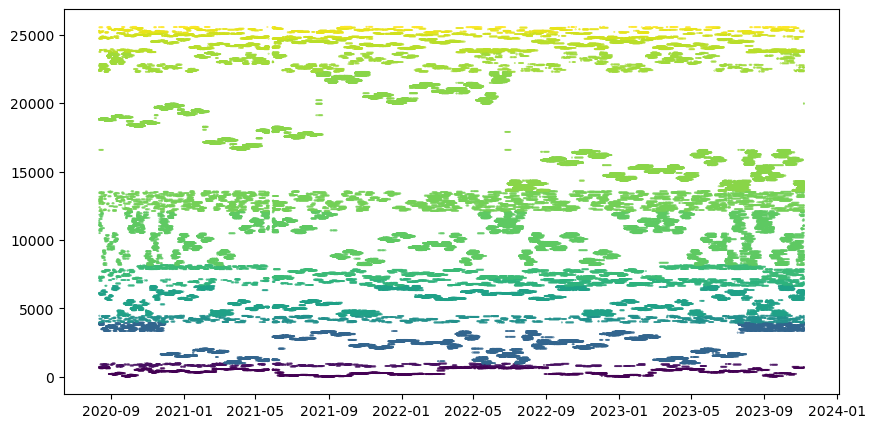

In [68]:
from datetime import datetime
from tqdm import tqdm

X = []
# X_title = []
Y = []
C = []

for i in tqdm(range(len(tmp))):
    for date in tmp.iloc[i]['trending_date_list']:
        X.append(i)
        # X_title.append(tmp.iloc[i]['title'])
        Y.append(datetime.strptime(date, "%Y-%m-%d"))
        C.append(tmp.iloc[i]['categoryId'])
        
plt.figure(figsize = (10, 5))
plt.scatter(Y, X, c = C, s = 0.1)
plt.show()

In [70]:
from collections import Counter

counter = Counter(C)

print(counter)

Counter({24: 79386, 22: 38643, 10: 27231, 17: 17812, 23: 14852, 26: 10194, 25: 9717, 20: 8992, 1: 6515, 19: 5543, 15: 4878, 27: 3872, 28: 3552, 2: 2141, 29: 426})


In [85]:
new_counter = {category_mapping[key]: value for key, value in counter.items() if key in category_mapping}

new_counter['Nonprofits & Activism'] = 426

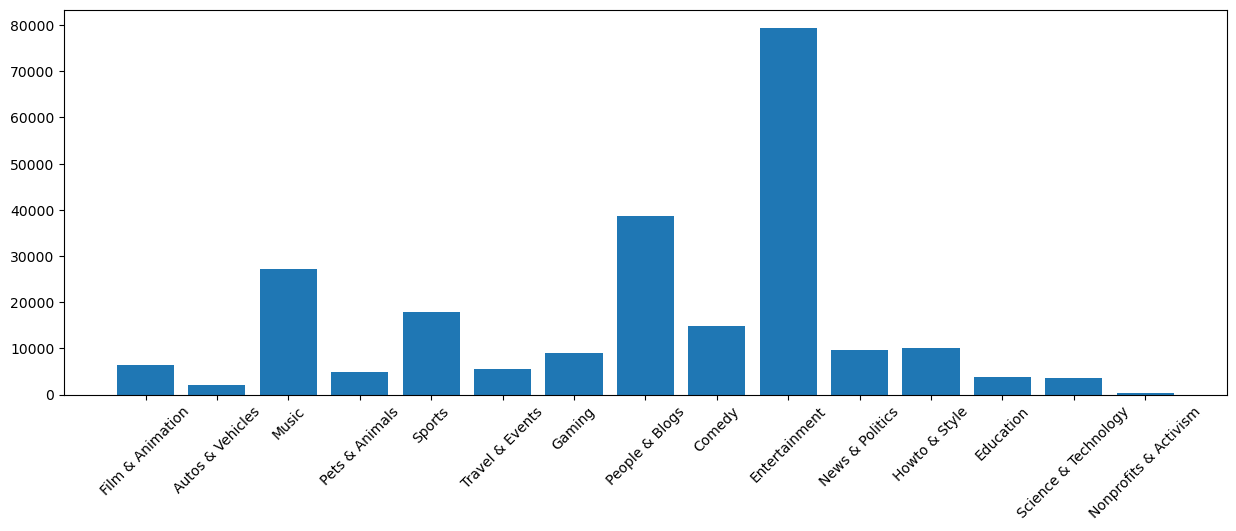

In [93]:
keys = new_counter.keys()
values = new_counter.values()


plt.figure(figsize = (15, 5))
plt.bar(keys, values)
plt.xticks(rotation = 45)
plt.show()

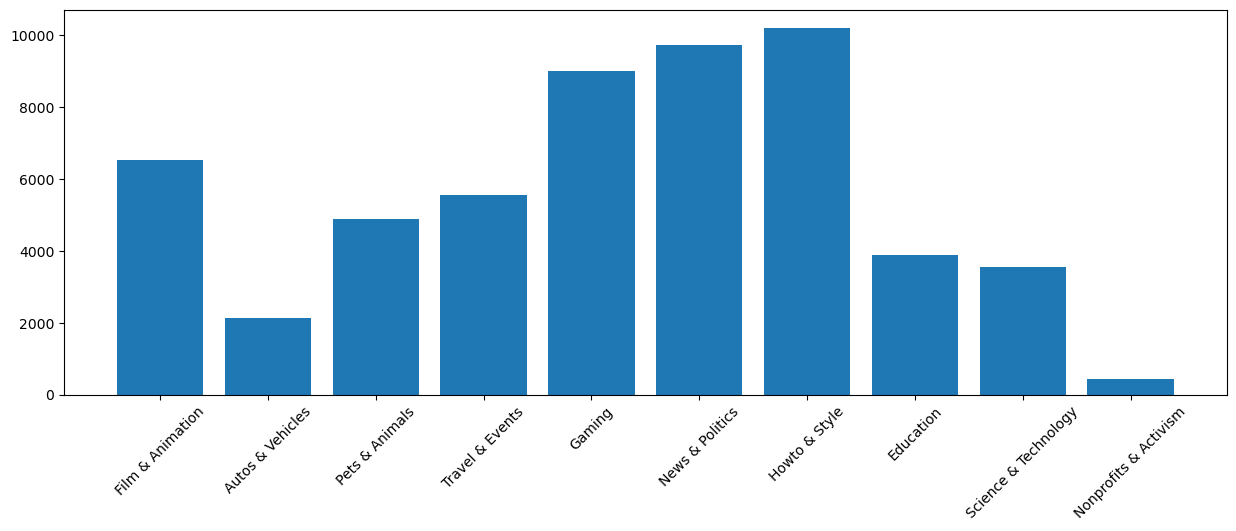

In [94]:
del new_counter['Entertainment']
del new_counter['People & Blogs']
del new_counter['Music']
del new_counter['Sports']
del new_counter['Comedy']

keys = new_counter.keys()
values = new_counter.values()


plt.figure(figsize = (15, 5))
plt.bar(keys, values)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
X = []
X_title = []
Y = []
C = []

for i in range(len(tmp)):
    for date in tmp.loc[i]['trending_date_list']:
        X.append(i)
        X_title.append(tmp.loc[i]['title'])
        Y.append(datetime.strptime(date, "%Y-%m-%d"))
        C.append(tmp.loc[i]['categoryId'])
        
plt.scatter(X, Y, c = C, s = 0.1)
plt.show()

In [41]:
tmp.loc[0]['trending_date_list']

['2020-08-12',
 '2020-08-13',
 '2020-08-14',
 '2020-08-15',
 '2020-08-16',
 '2020-08-17',
 '2020-08-18']

In [46]:
tmp['categoryId'].unique()

array([ 1,  2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29],
      dtype=int64)

In [115]:
category_mapping[29] = 'Nonprofits & Activism'

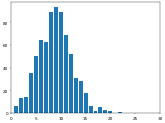

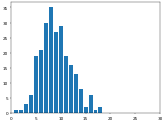

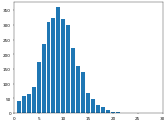

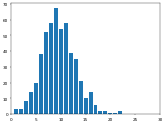

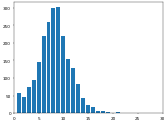

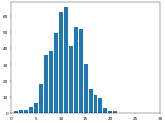

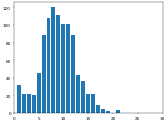

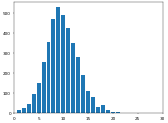

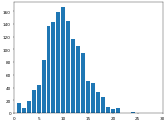

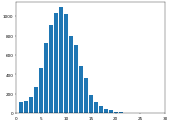

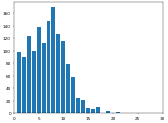

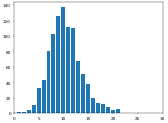

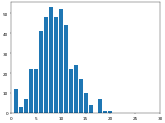

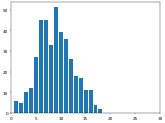

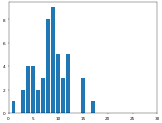

In [64]:
from collections import Counter

for cid in tmp['categoryId'].unique():
    ctmp = tmp[tmp['categoryId'] == cid]
    X = []
    for x in ctmp['trending_date_list']:
        X.append(len(x))
    Xcnt = Counter(X)
    XX = list(Xcnt.keys())
    YY = list(Xcnt.values())
    
    plt.figure(dpi=30) 
    plt.xlim([0, 30])
    plt.bar(XX, YY)
    plt.show()
    

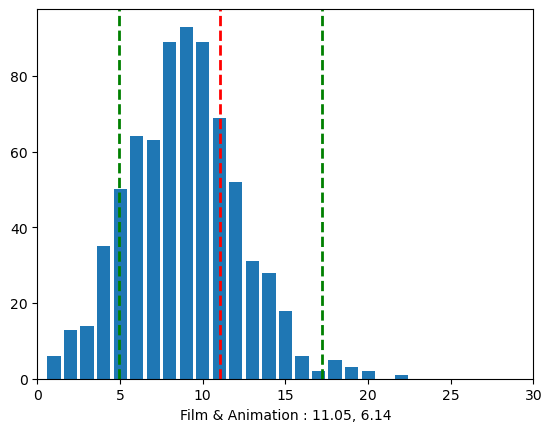

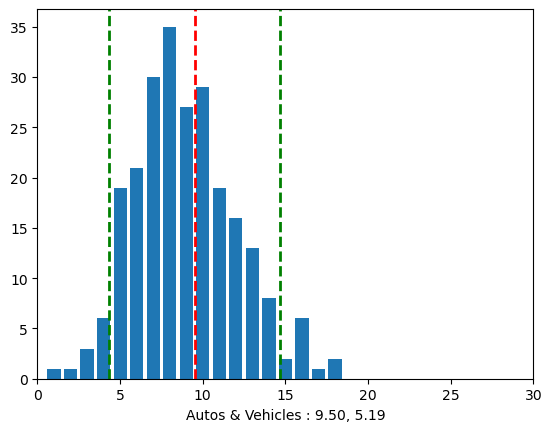

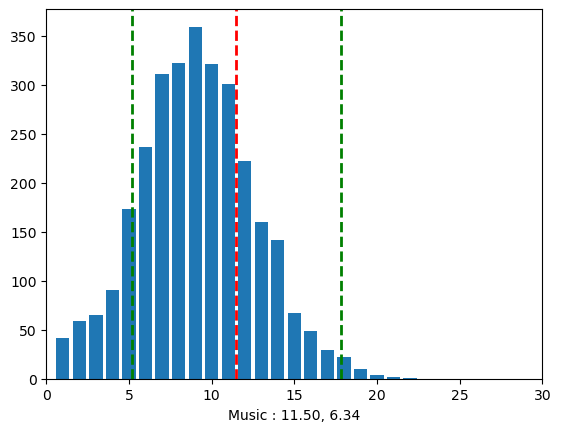

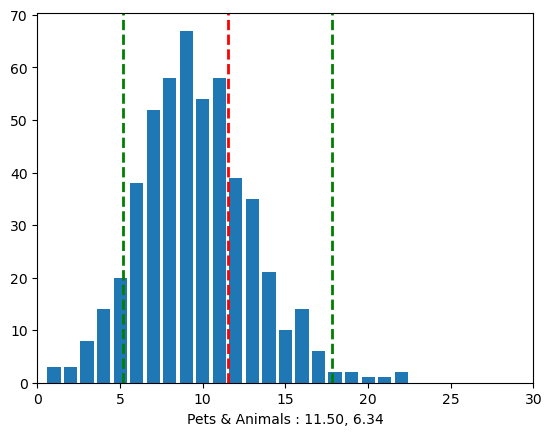

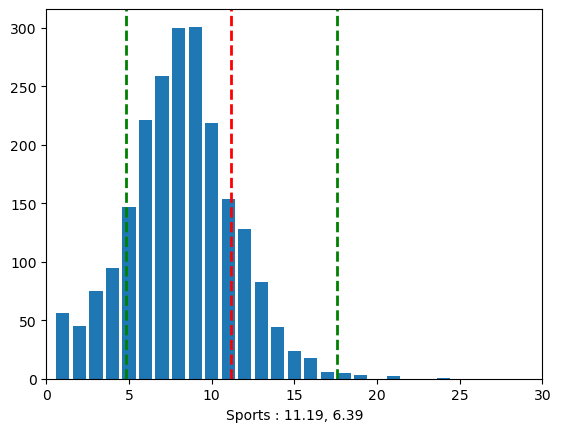

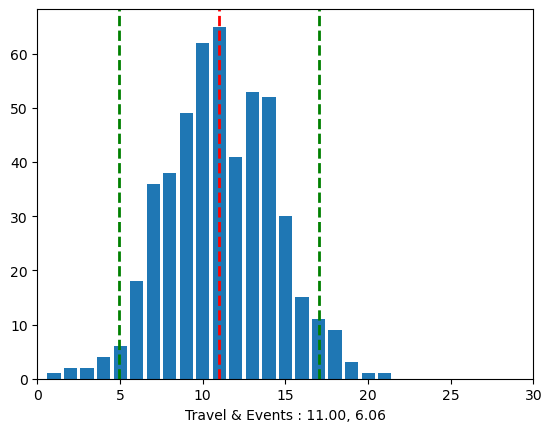

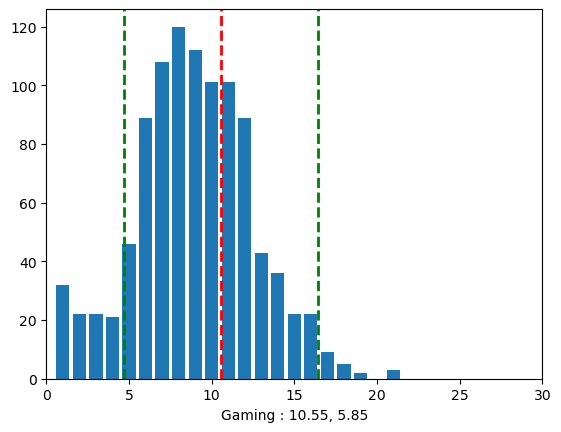

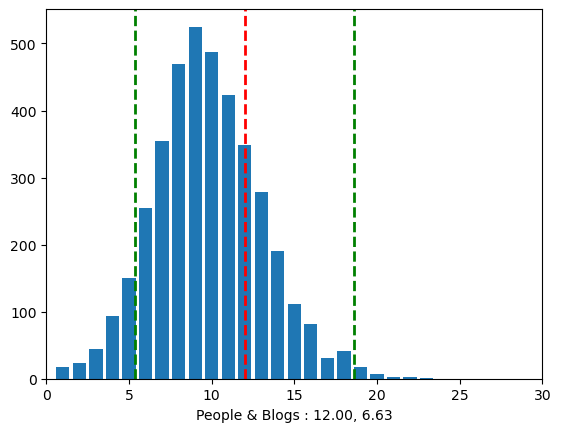

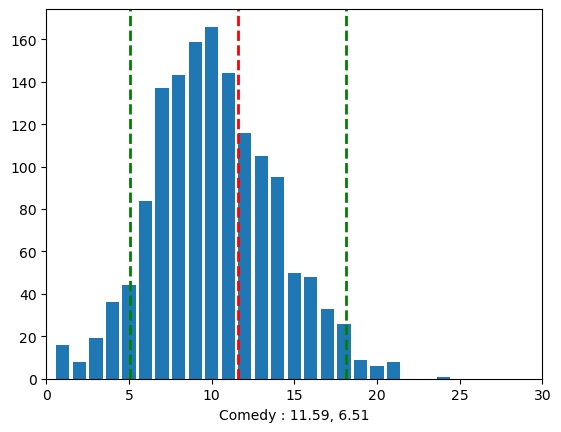

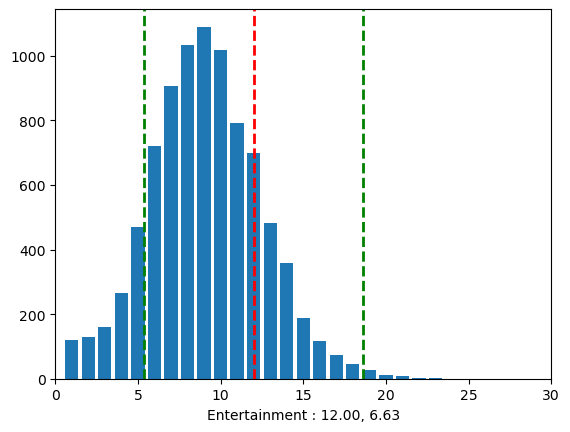

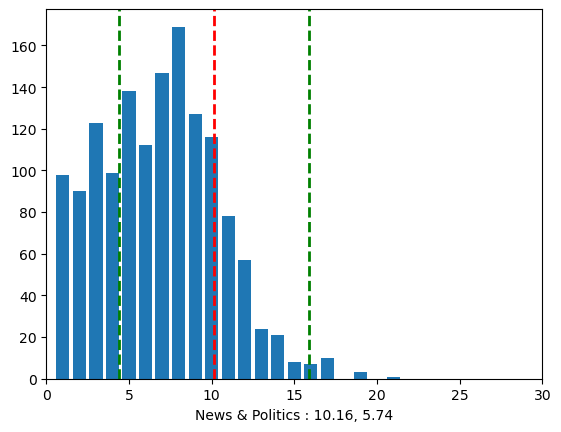

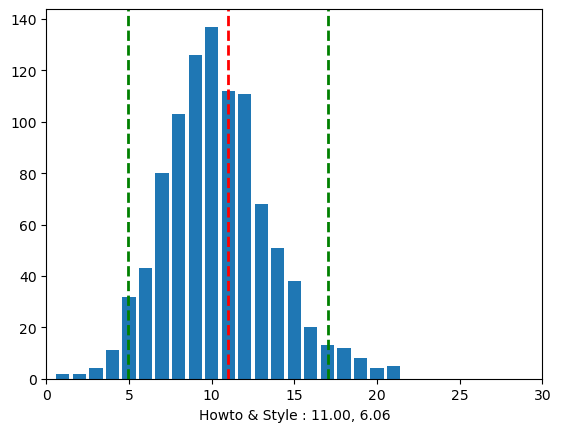

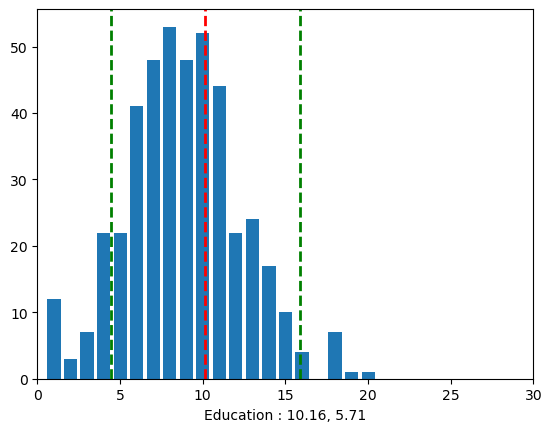

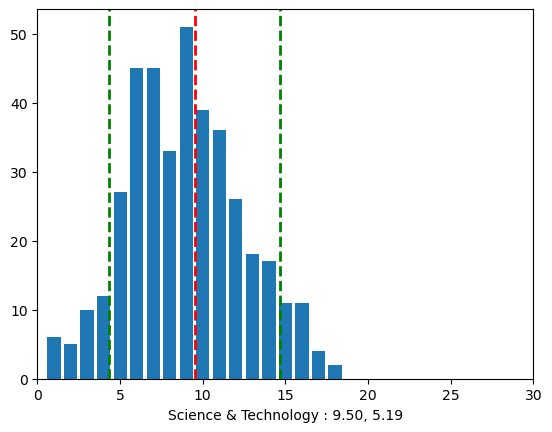

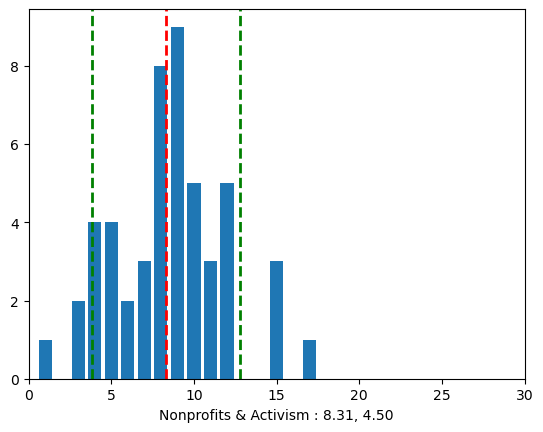

In [121]:
import numpy as np

for cid in tmp['categoryId'].unique():
    ctmp = tmp[tmp['categoryId'] == cid]
    X = []
    for x in ctmp['trending_date_list']:
        X.append(len(x))
    Xcnt = Counter(X)
    XX = list(Xcnt.keys())
    YY = list(Xcnt.values())
    
    mean = np.mean(XX)
    variance = np.std(XX)
    
    plt.figure(dpi=100) 
    plt.xlim([0, 30])
    plt.bar(XX, YY)
    # print(f"{category_mapping[cid]} : {mean}, {variance}")
    # 평균
    plt.axvline(mean, color = 'r', linestyle = 'dashed', linewidth = 2)
    
    # 표준편차
    plt.axvline(mean - variance, color = 'g', linestyle = 'dashed', linewidth = 2)
    plt.axvline(mean + variance, color = 'g', linestyle = 'dashed', linewidth = 2)
    
    # 제목 카테고리명 : 평균, 분산
    plt.xlabel(f"{category_mapping[cid]} : {mean:.2f}, {variance:.2f}")
    
    plt.savefig(f'{category_mapping[cid]}.png')
    plt.show()
    plt.close()
    